In [4]:
from utility import dse_backup, parse_pickle, plot
import pickle
import matplotlib.pyplot as plt
import numpy as np

histories_multi_fidelity = parse_pickle.parse_pickle('multi_fidelity_mfes_inner20_rt20_mr100')
histories_single_fidelity = parse_pickle.parse_pickle('single_fidelity_inner20_rt20_mr50', strategy='single_fidelity')
histories_random = parse_pickle.parse_pickle('random_inner20_rt20_mr50', strategy='random')

# curve_multi_fidelity = plot.get_curve(histories_multi_fidelity, strategy='multi_fidelity')
# curve_single_fidelity = plot.get_curve(histories_single_fidelity, strategy='single_fidelity')
# curve_random = plot.get_curve(histories_random, strategy='random')

curve_highest_mean_multi_fidelity = plot.get_highest_mean_curve(histories_multi_fidelity, strategy='multi_fidelity')
curve_highest_mean_single_fidelity = plot.get_highest_mean_curve(histories_single_fidelity, strategy='single_fidelity')
curve_highest_mean_random = plot.get_highest_mean_curve(histories_random, strategy='random')


In [5]:
import seaborn as sns

sns.set_style('darkgrid') # darkgrid, white grid, dark, white and ticks
plt.rc('axes', titlesize=20)     # fontsize of the axes title
plt.rc('axes', labelsize=14)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=13)    # fontsize of the tick labels
plt.rc('ytick', labelsize=13)    # fontsize of the tick labels
plt.rc('legend', fontsize=13)    # legend fontsize
plt.rc('font', size=13)          # controls default text sizes
sns.color_palette('deep')
plt.figure(figsize=(10,6), tight_layout=True)

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

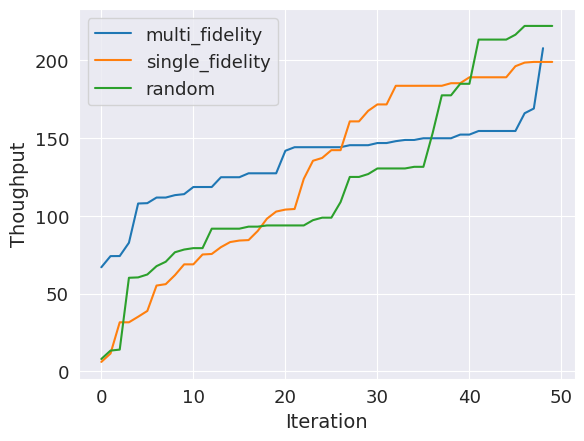

In [6]:
# plt.plot(np.arange(len(curve_multi_fidelity[0])), -curve_multi_fidelity[0], label='multi_fidelity')
# plt.plot(np.arange(len(curve_single_fidelity)), -curve_single_fidelity, label='single_fidelity')
# plt.plot(np.arange(len(curve_random)), -curve_random, label='random')

plt.plot(np.arange(len(curve_highest_mean_multi_fidelity[0])), -curve_highest_mean_multi_fidelity[0], label='multi_fidelity')
plt.plot(np.arange(len(curve_highest_mean_single_fidelity)), -curve_highest_mean_single_fidelity, label='single_fidelity')
plt.plot(np.arange(len(curve_highest_mean_random)), -curve_highest_mean_random, label='random')

plt.xlabel('Iteration')
plt.ylabel('Thoughput')

plt.legend()
plt.show()

In [ ]:
curve_multi_fidelity_max = np.zeros(len(curve_multi_fidelity[0]))
# curve_single_fidelity_max = np.zeros(len(curve_single_fidelity))
# curve_random_max = np.zeros(len(curve_random))

for i in range(len(curve_multi_fidelity[0])):
    curve_multi_fidelity_max[i] = min(curve_multi_fidelity[0][:i+1])
# for i in range(len(curve_single_fidelity)):
#     curve_single_fidelity_max[i] = min(curve_single_fidelity[:i+1])
# for i in range(len(curve_random)):
#     curve_random_max[i] = min(curve_random[:i+1])

plt.plot(np.arange(len(curve_multi_fidelity_max)), -curve_multi_fidelity_max, label='multi_fidelity')
# plt.plot(np.arange(len(curve_single_fidelity_max)), -curve_single_fidelity_max, label='single_fidelity')
# plt.plot(np.arange(len(curve_random_max)), -curve_random_max, label='random')

plt.xlabel('Iteration')
plt.ylabel('Thoughput')

plt.legend()
plt.show()

In [ ]:
import pickle
from openbox import Optimizer, sp, History
from ConfigSpace import Configuration


with open('./result/pickle/single_fidelity_v0.4.pickle', 'rb') as f: # historis shape: max_runs, 3(e.g. None, fidelity1, fidelity2), length of fidelity 1 history (or 2) 
    histories = pickle.load(f)



In [ ]:
inc_obj = []
inc_cfg = []
for i in range(len(histories)):
    inc_obj.append(histories[i].get_incumbents()[0].objectives[0])
    inc_cfg.append(histories[i].get_incumbents()[0].config)

print(inc_obj)
print(inc_cfg)

In [6]:
import numpy as np
x = np.load('./data/design_points.npy', allow_pickle=True)
print(x[0])

[3.20e+01 1.28e+02 4.00e+00 3.20e+01 4.00e+00 4.00e+00 2.50e-01 8.00e+00
 8.00e+00 9.00e+02 1.00e+00 1.00e+00]


In [7]:
max_col = np.amax(x, axis=0)
min_col = np.amin(x, axis=0)
print(max_col)
print(min_col)

[5.120e+02 2.048e+03 2.560e+02 4.096e+03 4.000e+00 4.000e+00 1.000e+00
 8.400e+01 9.600e+01 9.000e+02 5.500e+01 7.300e+01]
[3.20e+01 1.28e+02 4.00e+00 3.20e+01 4.00e+00 4.00e+00 2.50e-01 8.00e+00
 8.00e+00 9.00e+02 1.00e+00 1.00e+00]


In [5]:
import pickle
with open('data/design_space.pickle', 'rb') as f:
    y = pickle.load(f)

for i in range(len(y)):
    y[i] = list(y[i])
    y[i].sort()
print(y)

[[32, 48, 64, 128, 256, 512], [128, 256, 512, 1024, 2048], [4, 8, 16, 32, 64, 128, 256], [32, 64, 128, 256, 512, 1024, 2048, 4096], [4], [4], [0.25, 0.5, 0.75, 1.0], [8, 12, 16, 20, 24, 28, 32, 36, 40, 44, 48, 52, 56, 60, 64, 68, 72, 76, 80, 84], [8, 12, 16, 20, 24, 28, 32, 36, 40, 44, 48, 52, 56, 60, 64, 68, 72, 76, 80, 84, 88, 92, 96], [900], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73]]
